In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
exp = 12 # 2**12 = 4096
table_len = 2**exp

t = np.linspace(0.0, 1.0, table_len)

In [3]:
def plot_table(t, table, table_name: str, table_len: int):
    title = table_name.replace("_", " ")
    plt.plot(t * table_len, table)
    plt.title(f"{title} {table_len}")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.savefig(f"{table_name}{table_len}.pdf")

def create_header(table, table_name: str, table_len: int):
    tab = "    "
    file_path = f'{table_name}{table_len}.h'

    with open(file_path, 'w') as fp:
        fp.write(f'#ifndef {table_name}_{table_len}_H\n')
        fp.write(f'#define {table_name}_{table_len}_H\n')
        fp.write('\n')
        fp.write(f'// Automatically generated header file. Do not edit manually!\n')
        fp.write('\n')
        fp.write("namespace bdsp::wavetable\n")
        fp.write("{\n\n")
        fp.write(f'{tab}constexpr float {table_name}{table_len}[{table_len}] = \n')
        fp.write(f'{tab + tab}')
        fp.write("{\n")
        for x in table:
            fp.write(f'{tab + tab + tab}{x},\n')
        fp.write(f'{tab + tab}')
        fp.write('};\n')
        fp.write('\n')
        fp.write("} // namespace bdsp::wavetable\n")
        fp.write("\n")
        fp.write(f'#endif // {table_name}_{table_len}_H\n')
    
def create_audio(table, table_len, pitch):
    sample_rate = 48000
    num_samples = int(sample_rate * 1.5) # seconds
    audio = np.zeros(num_samples)
    
    delta = table_len / sample_rate * pitch
    
    read_idx = 0
    for n in range(num_samples):
        audio[n] = table[read_idx]
        
        read_idx = int(read_idx + delta)
        if read_idx >= table_len:
            read_idx -= table_len
    
    # Create fades at table ends to prevent discontinuity clicks
    fade_time = 0.1 # seconds
    num_samples_in_fade = int(sample_rate * fade_time)
    for i in range(num_samples_in_fade):
        ramp = i / (num_samples_in_fade - 1)
        audio[i] *= ramp
        audio[(num_samples - 1) - i] *= ramp
                
    return Audio(audio, rate=sample_rate, autoplay=False)

    

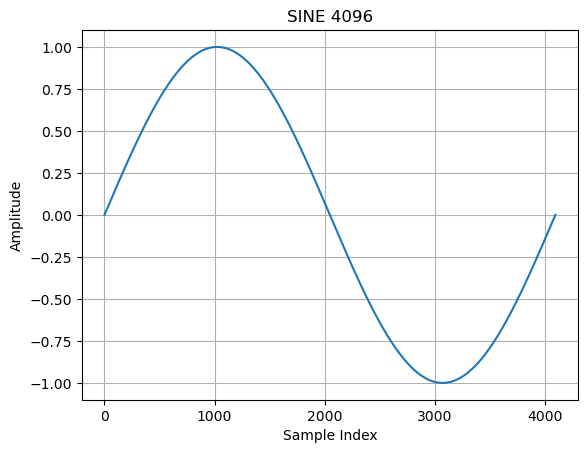

In [4]:
"""
SINE
"""

table_name = "SINE"

def create_sine(t, table_len) -> np.ndarray:
    table = np.sin(2.0 * np.pi * t)
    return table

table = create_sine(t, table_len)

plot_table(t, table, table_name, table_len)
create_header(table, table_name, table_len)
create_audio(table, table_len, 440)

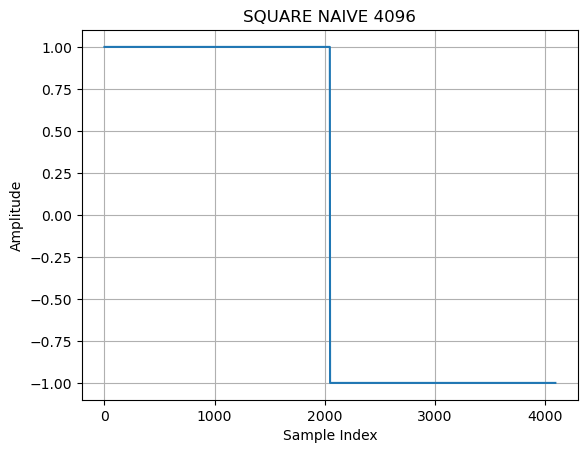

In [5]:
"""
SQUARE (NAIVE)
"""

table_name = "SQUARE_NAIVE"

def create_square_naive(t, table_len) -> np.ndarray:
    table = np.zeros(table_len)
    for idx, time in enumerate(t):
        table[idx] = np.sign(-(2.0 * idx / (table_len - 1) - 1.0))
    return table

table = create_square_naive(t, table_len)
plot_table(t, table, table_name, table_len)
create_header(table, table_name, table_len)
create_audio(table, table_len, 440)

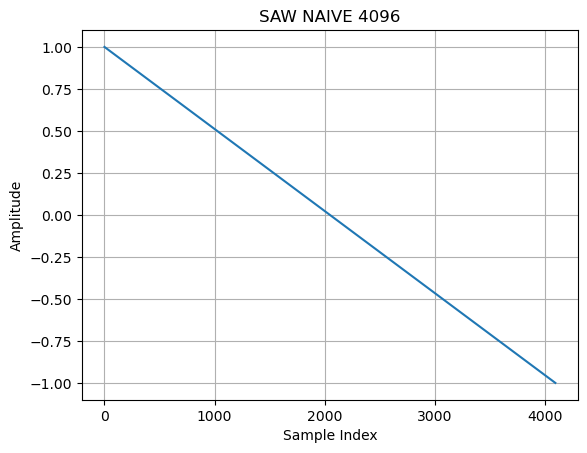

In [6]:
"""
SAW (NAIVE)
"""

table_name = "SAW_NAIVE"

def create_saw_naive(t, table_len) -> np.ndarray:
    table = np.zeros(table_len)
    for idx, time in enumerate(t):
        table[idx] = -(2.0 * idx / (table_len - 1) - 1.0)
    return table

table = create_saw_naive(t, table_len)
plot_table(t, table, table_name, table_len)
create_header(table, table_name, table_len)
create_audio(table, table_len, 440)

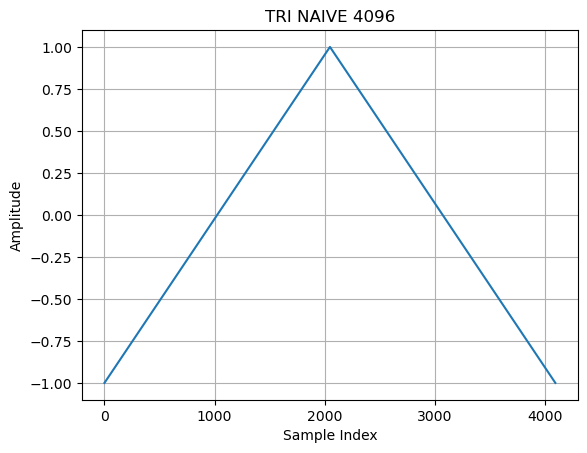

In [7]:
"""
TRI (NAIVE)
"""

table_name = "TRI_NAIVE"

def create_tri_naive(t, table_len) -> np.ndarray:
    saw = create_saw_naive(t, table_len)
    table = -2.0 * (np.abs(saw)) + 1.0
    return table

table = create_tri_naive(t, table_len)
plot_table(t, table, table_name, table_len)
create_header(table, table_name, table_len)
create_audio(table, table_len, 440)